Copyright (c) Microsoft Corporation. All rights reserved.

Licensed under the MIT License.

## Lab 1:  Train a Model in Azure Notebook

### You are excited to jump in and traing a model that predicts the type of bicycle a customer will purchase.  Initially, you decide to keep things simple and explore the data and train the model in a local notebook without any Azure resources.  Normally, you would do this on your own machine but you discovered the free Azure Notebooks service and decide to work there. Since the Azure Notebook environment is preconfigured with the Azure ML service SDKs (which can be pretty version specific) and all the popular Python packages you use, working in Azure Notebook will make migrating your model to Azure much easier.

## Introduction
In this example you will use a data extract file provided by your team's data engineer.  Fortunately, the extract has all the columns you think are useful to train a model that predicts the bike type a customer will purchase. 

In this notebook you will:
1. Perform exploratory data analysis.
2. Create model features.
3. Train a classification model.

# Make sure you have the notebook set to the AML kernel.

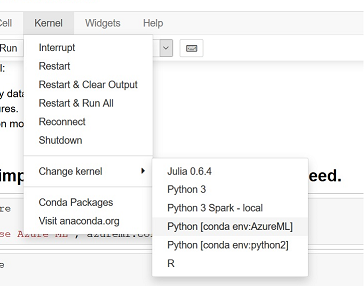

## Let's start by importing the Python modules we will need.
## Starting with the AML Python SDK.

In [ ]:
import azureml.core

print("Ready to use Azure ML", azureml.core.VERSION)

## If you do not see version 1.0.74 or higher, you do not have the latest SDK installed. 
## If so, uncomment and run the cell below to upgrade the AMLS Python sdk.

In [1]:
'''
!pip install --upgrade azureml-sdk[notebooks]

import azureml.core
print("Ready to use Azure ML", azureml.core.VERSION)
'''

'\n!pip install --upgrade azureml-sdk[notebooks]\n\nimport azureml.core\nprint("Ready to use Azure ML", azureml.core.VERSION)\n'

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## Explore the Data

### If you have not uploaded the file, AWBikeSales.csv to the Azure Notebook folder where this notebook is running from, do so now. 

### Load the extract file AWBikesSales.csv into a dataframe.

In [ ]:
import pandas as pd

df_bikesales = pd.read_csv(r'./AWBikeSales.csv', encoding ='latin1')

print('Complete')

In [ ]:
# Let's list the columns...

df_bikesales.dtypes

In [ ]:
# Let's view a few rows of data...

df_bikesales.head()

# Exploratory Data Analysis

## 1)  One column that intrigues you is the customer YearlyIncome as that could affect the type of bike a customer buys.  Create a bar chart showing the count of customers for each value of YearlyIncome.  What does this tell you about Adventure Works customers?  Note: For better display of labels, you may want to divide YearlyIncome by 1000.

## 2)  Age seems like an attribute that would affect this model.  List the highest, lowest, median, mean, and quartiles of the Customers's age.

## 3)  Create a pie chart of the count of customers by Education.

## Where's the Bike Type?

### You notice that there is no Bike Type column.  Fortunately, the ModelName has the bike type as the first word in the name followed by a dash.  You decide to extract this and put it in a new column named BikeType, i.e. Touring, Road, Mountain.  This is what the model will be trained to predict.  Use the cell below to extract the Bike Type to a new column named BikeType.

### Now do a count by BikeType to see how it breaks out.

## Feature Engineering:

### Looking at the data, some columns seem like they would be more useful, if they were transformed.  

### > For example, the number of children at home seems less important than if there are any children at home.  
### > Individual ages seems less relavant than age ranges like under 18 and over 60.  
### > YearlyIncome is more useful in ranges like low, medium, high.  


# Add columns that transform the data as follows. 

### - Convert ChildrentAtHome from continuous value to boolean
### - Convert Age to Age Bands making it a categorical value
### - Convert YearlyIncome into Income Bands making it a categorical value

### In the cell below, convert Children at home to 'yes' if it is greater than zero, otherwise set it to 'no'.

### In the cell below, create a column AgeBand that assigns a string value based on value as follows:

- '0-18'
- '19-29'
- '30-39'
- '40-49'
- '50-59'
- '60+'

#### In the cell below, create a column AgeBand that assigns a string value based on value as follows:

- '0-49k'
- '50-99k'
- '100-149k'
- '150-199k'
- '200-299k'
- '300+'

## All of our input features are really categories and need to be converted to categorical variables before they can be used in model training.  Categorical variables are number that represent a category.  Create a new column that is the source column name suffixed with Cat for the columns below:

Example:  BikeTypeCat will hold the categorical value of BikeType.

- BikeType
- AgeBand
- IncomeBand
- MaritalStatus
- Gender
- ChildrenAtHome
- CountryRegionCode
- HouseOwnerFlag
- Education
- Occupation
- CommuteDistance

## Convert categorical variables...

# Create BikeType dictionary to translate our predicted values...

### A problem with using categorical values is that you can't tell what the predicted result is.  Run the code below to create a Python dictionary to be used later to translated predicted bike type values.  There are a number of ways to do this but to make this a bit easier, the code is done for you.

### Note:  Pandas has a module called pandassql that let's us use SQL with dataframes.  You may find some queries easier using SQL.

In [ ]:
!pip install --upgrade pandasql[notebooks]

print('Complete')

In [12]:
from pandasql import *

pysqldf = lambda q: sqldf(q, globals())

df_types = sqldf('select distinct BikeType, BikeTypeCat from df_bikesales order by BikeTypeCat')
df_types

BikeType  BikeTypeCat
0  Mountain            0
1      Road            1
2   Touring            2

In [13]:
typedict = dict(zip(df_types.BikeTypeCat, df_types.BikeType))
typedict

{0: 'Mountain', 1: 'Road', 2: 'Touring'}

# Extract the features to a new dataframe and display a few rows to confirm it worked.  Call the new features dataframe df_features.

# The scikit-learn models only support numpy arrays, not dataframes so we need to convert our dataframe to a numpy array.  Fortunately, the pandas dataframe values method will do this for us. 

In [60]:
# Exampls of using the values method...

df_features.values

array([[1, 5, 1, ..., 1, 1, 0],
       [0, 3, 0, ..., 3, 0, 2],
       [0, 5, 0, ..., 5, 1, 2],
       ...,
       [2, 3, 2, ..., 0, 1, 4],
       [1, 2, 0, ..., 0, 1, 3],
       [1, 4, 0, ..., 0, 1, 4]], dtype=int8)

# Split the data...

### Extract the response variable...

### Extract the feature columns...

# Train the model...

### Goal:  We want to train a model to predict the type of bicylce a potential customer would purchase based on customer data we have for non bike purchases.  This is a classification problem with three possible outcomes:  Road, Mountain, or, Touring.  

### Use the RandomForestClassifier from the sklearn module to train our model. 

## Import the required libraries below.  

In [96]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
print('Libraries Imported')

Libraries Imported


## Enter your model training code below. 

# About model performance...

### Our goal is to learn how touse Azure Machine Learning service and the performance of our model does not matter towards that end. Don't worry if the model is not predicting very well. Performance can be improved by more experimentation. Also, Azure Machine Learning service AutoML, which we will see later, can tune the mode for you.

## Predict outcomes using the test data and and display the confusion matrix.  Ideally, the model should predict well but don't worry if it does not. You can use the cell below and insert new ones as you like.

# Save the feature set data from future labs.

In [17]:
import pandas as pd

df_features.to_csv(r'./BikeModelFeatures.csv', sep=',', index=False)

## Save the typedict dictionary values so we can translate future model predictions to the string value.

In [120]:
import pickle

f = open("typedict.pkl","wb")
pickle.dump(typedict,f)
f.close()

## Save the trained model for later...

In [121]:
joblib.dump(classifier, 'biketypeclassifier.pkl') 

['biketypeclassifier.pkl']